In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\Demoted\AppData\Local\Temp\ipykernel_29128\4040281785.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_parts = plt.boxplot([df[df['Noise_Quartile'] == 'Q1 (Low)']['LBW_Rate'],


✓ Visualization 5 saved: visualizations/visualization_media/viz_05_boxplot_lbw_by_noise_quartiles.png


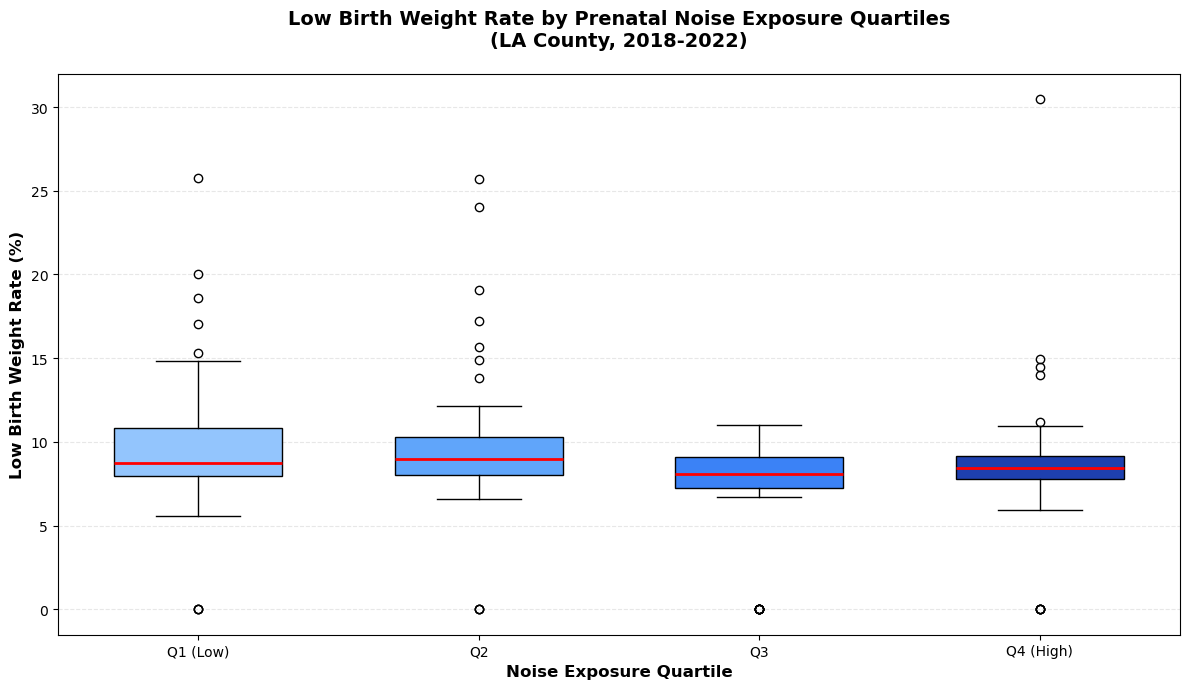


LBW Rate statistics by Noise Quartile:
                count      mean       std  min       25%       50%        75%  \
Noise_Quartile                                                                  
Q1 (Low)         61.0  9.779638  4.165844  0.0  7.971014  8.730692  10.807860   
Q2               61.0  9.607911  4.247250  0.0  8.032787  8.951175  10.315534   
Q3               60.0  7.378154  3.113978  0.0  7.216739  8.066326   9.093080   
Q4 (High)        61.0  8.461041  4.086994  0.0  7.799728  8.407949   9.143269   

                      max  
Noise_Quartile             
Q1 (Low)        25.752508  
Q2              25.719424  
Q3              11.018182  
Q4 (High)       30.461538  


C:\Users\Demoted\AppData\Local\Temp\ipykernel_29128\4040281785.py:40: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('Noise_Quartile')['LBW_Rate'].describe())


In [3]:
os.chdir('C:/Users/Demoted/Downloads/datasci/Data_Science_FP')

df = pd.read_csv('Cleaned output data files/final_model_dataset.csv')

df['Noise_Quartile'] = pd.qcut(df['combined_noise_mean_db'], q=4, 
                               labels=['Q1 (Low)', 'Q2', 'Q3', 'Q4 (High)'])

plt.figure(figsize=(12, 7))

box_parts = plt.boxplot([df[df['Noise_Quartile'] == 'Q1 (Low)']['LBW_Rate'],
                          df[df['Noise_Quartile'] == 'Q2']['LBW_Rate'],
                          df[df['Noise_Quartile'] == 'Q3']['LBW_Rate'],
                          df[df['Noise_Quartile'] == 'Q4 (High)']['LBW_Rate']],
                        labels=['Q1 (Low)', 'Q2', 'Q3', 'Q4 (High)'],
                        patch_artist=True, widths=0.6)

colors = ['#93c5fd', '#60a5fa', '#3b82f6', '#1e40af']
for patch, color in zip(box_parts['boxes'], colors):
    patch.set_facecolor(color)

for median in box_parts['medians']:
    median.set(color='red', linewidth=2)

plt.xlabel('Noise Exposure Quartile', fontsize=12, fontweight='bold')
plt.ylabel('Low Birth Weight Rate (%)', fontsize=12, fontweight='bold')
plt.title('Low Birth Weight Rate by Prenatal Noise Exposure Quartiles\n(LA County, 2018-2022)', 
          fontsize=14, fontweight='bold', pad=20)
plt.grid(True, alpha=0.3, axis='y', linestyle='--')

plt.tight_layout()

os.makedirs('visualizations/visualization_media', exist_ok=True)
plt.savefig('visualizations/visualization_media/viz_05_boxplot_lbw_by_noise_quartiles.png', dpi=300, bbox_inches='tight')

print("✓ Visualization 5 saved: visualizations/visualization_media/viz_05_boxplot_lbw_by_noise_quartiles.png")

plt.show()

print("\nLBW Rate statistics by Noise Quartile:")
print(df.groupby('Noise_Quartile')['LBW_Rate'].describe())